In [2]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from scipy.stats import norm
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle, filter_terms_not_in_wemodel

([<matplotlib.axis.YTick at 0x1a401834b48>,
 <a list of 5 Text yticklabel objects>)

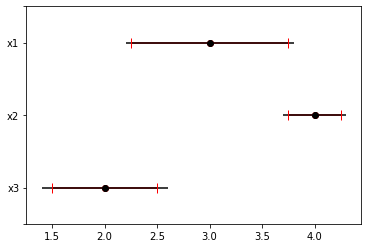

In [8]:
import matplotlib.pyplot as plt

x = [2, 4, 3]
y = [1, 3, 5]
errors = [0.5, 0.25, 0.75]
errors2 = [0.6, 0.3, 0.8]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'r', capsize=5)
plt.errorbar(x, y, xerr=errors2, fmt = 'o', color = 'k')
plt.yticks((0, 1, 3, 5, 6), ('', 'x3', 'x2', 'x1','')) 

In [2]:
we_model_name = "sg_dim300_min100_win5"
we_vector_size = 300
we_model_dir = '../data/external/wiki-english/wiki-english-20171001/%s' % we_model_name

we_model = Word2Vec.load(we_model_dir+'/model.gensim')
print ('loading done!')

loading done!


In [4]:
RESULTS_FILEPATH = '../data/interim/association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = '../data/interim/experiment_definitions.pickle'
SIGTEST_IMAGE_SAVE_FILEPATH = '../reports/figures/sigtest_intervals.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [13]:
results_dict[1]

defaultdict(dict,
            {'first': {'X_array': array([ 0.08113076,  0.18911934, -0.0954811 ,  0.13401467,  0.09897012,
                      0.19287561,  0.11558053,  0.06996465,  0.12096066,  0.12797187,
                      0.11942707,  0.18256408,  0.17806363,  0.17999095,  0.11687332,
                      0.08817419,  0.13236946,  0.10520089,  0.17782208,  0.09271343,
                      0.14632878,  0.13019669,  0.14671066,  0.15014505], dtype=float32),
              'Y_array': array([-0.04801004, -0.06460989, -0.08932857, -0.06297787, -0.40200305,
                     -0.1162259 ,  0.05139589, -0.29557508, -0.14763156,  0.11352445,
                     -0.1613886 , -0.0787251 , -0.19676779, -0.14766207, -0.03967397,
                      0.07359396, -0.04168847,  0.08253389, -0.0736915 , -0.06181172,
                      0.0839064 ,  0.08104831,  0.03454182, -0.13286161], dtype=float32),
              'X_mean': 0.12423697,
              'Y_mean': -0.068337,
            

In [124]:
def get_error(dist, interval_size):
    '''Interval size should be 0<x<1'''
    loc = np.mean(dist)
    scale = np.std(dist, ddof=1)
    err = loc - norm.ppf((1-interval_size)/2, loc=loc, scale=scale)
    return err

In [101]:
def get_p_value(dist, test_statistic):
    loc = np.mean(dist)
    scale = np.std(dist, ddof=1)
    return norm.cdf(test_statistic, loc=loc, scale=scale)

In [65]:
def add_axes_obj_labels(ax, test_num):
    X_AXIS_FONT_SIZE = 20
    Y_AXIS_FONT_SIZE = 15
    test_descriptions = {1: '$s(X_i, Y_i, A, B)$',
                         2: '$s(X, Y_i, A, B)$',
                         3: '$s(X_i, Y, A, B)$'}
    ax.set_xlabel(f'SigTest {test_num}: {test_descriptions[test_num]}',
                 fontsize=X_AXIS_FONT_SIZE)
    ax.set_ylabel(f'Experiment Number', fontsize=Y_AXIS_FONT_SIZE)

In [112]:
def annotate_points(ax, txt_array, x_array, y):
    POINT_FONT_SIZE = 10
    NUM_DECIMALS = 3
    for i in range(10):
        ax.annotate(np.round(txt_array[i], NUM_DECIMALS), (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [156]:
import matplotlib
matplotlib.__version__

'3.1.3'

TypeError: violinplot() got an unexpected keyword argument 'quantiles'

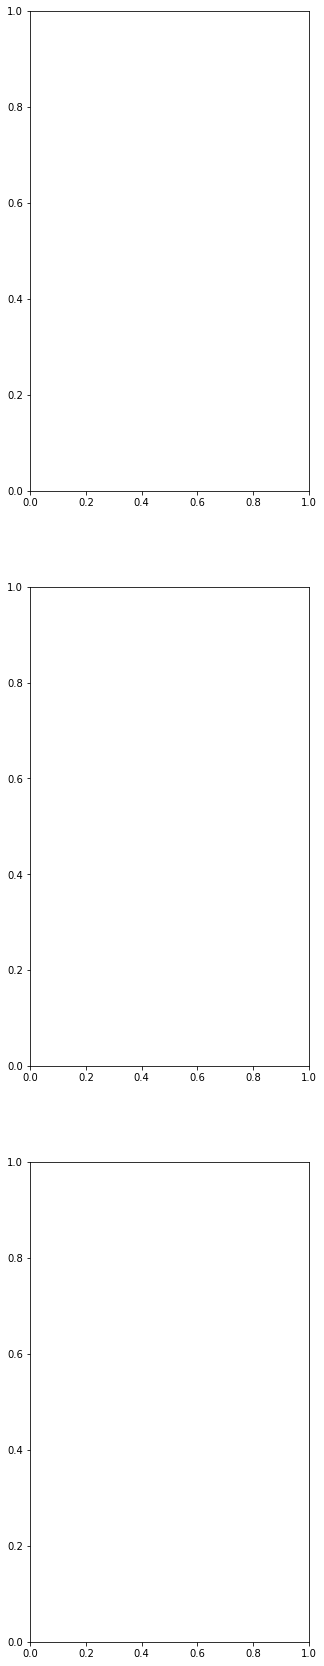

In [151]:
# Violinplot
fig, axs = plt.subplots(3,1, figsize=(5,30))
X_AXIS_LIMITS = [-0.1, 0.35]
Y_ANNOTATION_OFFSET = 0.1
exp_nums = [i for i in range(1,11)]

for test_num in range(1,4):
    ax = axs[test_num - 1]
    test_stats = [results_dict[exp_num]['second']['test_statistic'] for exp_num in exp_nums]
    means = [np.mean(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}']) for exp_num in exp_nums]
    y = [i for i in range(1,11)]
    errors_80 = [get_error(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], 0.8) for exp_num in exp_nums]
    errors_90 = [get_error(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], 0.9) for exp_num in exp_nums]
    errors_95 = [get_error(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], 0.95) for exp_num in exp_nums]
    
    #ax.errorbar(means, y, xerr=errors_80, fmt='|', color='r', capsize=5, label='80% CI')
    #ax.errorbar(means, y, xerr=errors_90, fmt='|', color='g', capsize=5, label='90% CI')
    #ax.errorbar(means, y, xerr=errors_95, fmt='|', color='k', capsize=5, label='95% CI')
    #ax.scatter(test_stats, y)
    dists = [results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'] for exp_num in exp_nums]
    ax.violinplot(dists, vert=False, quantiles=[0.5])
    #ax.set_xlim(X_AXIS_LIMITS)
    #fig.suptitle('Sig Tests', fontsize=20)
    #fig.text(0.04, 0.5, 'Experiment Number', va='center', rotation='vertical', fontsize=20)
    #p_values = [get_p_value(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], test_stats[exp_num-1]) \
    #                        for exp_num in exp_nums]
    #annotate_points(ax, p_values, test_stats, [c+Y_ANNOTATION_OFFSET for c in y])
    add_axes_obj_labels(ax, test_num)

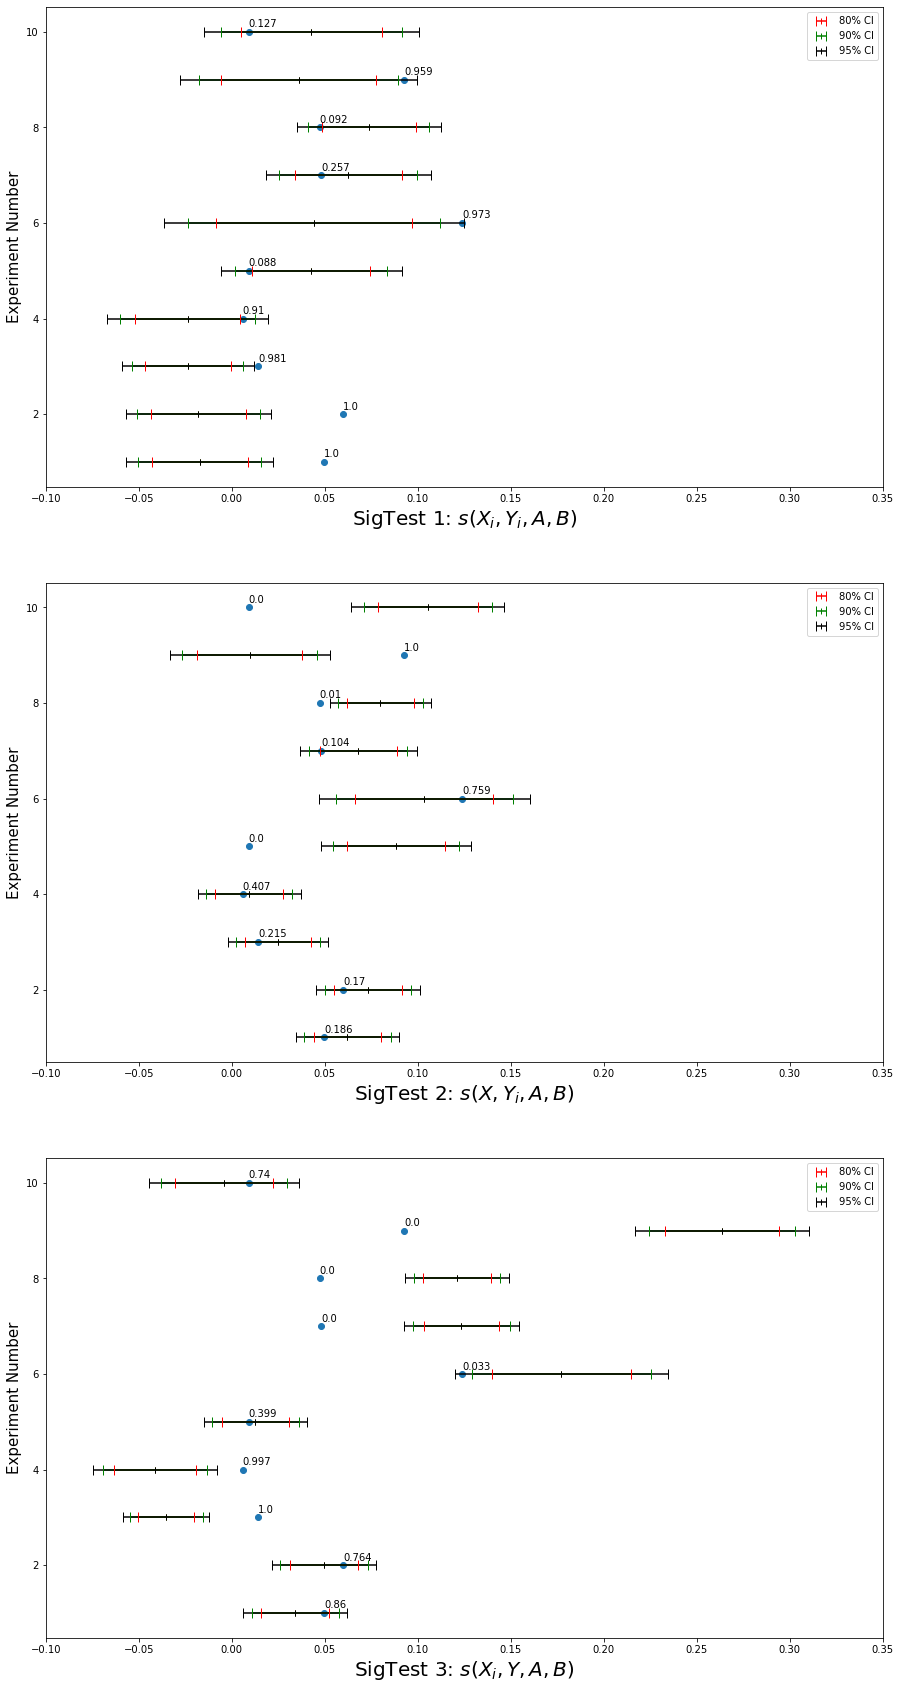

In [141]:
# Whiskers
fig, axs = plt.subplots(3,1, figsize=(15,30))
X_AXIS_LIMITS = [-0.1, 0.35]
Y_ANNOTATION_OFFSET = 0.1
exp_nums = [i for i in range(1,11)]

for test_num in range(1,4):
    ax = axs[test_num - 1]
    test_stats = [results_dict[exp_num]['second']['test_statistic'] for exp_num in exp_nums]
    means = [np.mean(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}']) for exp_num in exp_nums]
    y = [i for i in range(1,11)]
    errors_80 = [get_error(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], 0.8) for exp_num in exp_nums]
    errors_90 = [get_error(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], 0.9) for exp_num in exp_nums]
    errors_95 = [get_error(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], 0.95) for exp_num in exp_nums]
    
    ax.errorbar(means, y, xerr=errors_80, fmt='|', color='r', capsize=5, label='80% CI')
    ax.errorbar(means, y, xerr=errors_90, fmt='|', color='g', capsize=5, label='90% CI')
    ax.errorbar(means, y, xerr=errors_95, fmt='|', color='k', capsize=5, label='95% CI')
    ax.scatter(test_stats, y)
    dists = [results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'] for exp_num in exp_nums]
    ax.set_xlim(X_AXIS_LIMITS)
    #fig.suptitle('Sig Tests', fontsize=20)
    #fig.text(0.04, 0.5, 'Experiment Number', va='center', rotation='vertical', fontsize=20)
    p_values = [get_p_value(results_dict[exp_num]['second'][f'sigtest_dist_{test_num}'], test_stats[exp_num-1]) \
                            for exp_num in exp_nums]
    annotate_points(ax, p_values, test_stats, [c+Y_ANNOTATION_OFFSET for c in y])
    add_axes_obj_labels(ax, test_num)
    ax.legend()